In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Required Libraries for City Expansion Profit Predictor

# 1. Pandas
import pandas as pd
# Purpose: Data manipulation and analysis
# Usage: Loading CSV files, merging datasets, and performing data analysis

# 2. NumPy
import numpy as np
# Purpose: Numerical operations and calculations
# Usage: Handling numerical data and performing mathematical functions

# 3. Matplotlib
import matplotlib.pyplot as plt
# Purpose: Data visualization
# Usage: Creating plots and charts to visualize profit potential
%matplotlib inline

# 6. Copy
import copy
# Purpose: Create shallow or deep copies of objects
# Usage: Managing copies of data structures without affecting the original

# 7. Math
import math
# Purpose: Mathematical functions
# Usage: Performing mathematical calculations such as square roots, logarithms, etc.

# 8. Seaborn
import seaborn as sns
# Purpose: Advanced visualizations.
# Usage: Enhancing the aesthetics of your plots with statistical graphics.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
salary = pd.read_csv(r'C:\Users\user\Downloads\SalarySage\Salary Data.csv', encoding='UTF-8')


In [6]:
salary.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


**Project Objective
Although many features can influence salary, our focus will be on just two: years of experience and salary. We will develop a linear regression model that uses these two variables to predict salary based on years of experience, offering insights into how experience affects earning potential.**

In [7]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


**Key Columns for Salary Prediction
In my salary prediction project, I choose to focus on two main columns:**

**Years of Experience: This independent variable is crucial as it typically correlates with salary; more experience often leads to higher compensation.**

**Salary: This dependent variable is what we aim to predict based on the years of experience.**

**While my analysis centers on these two columns, it's worth noting that factors like Education Level and Job Title may also influence salary. By using linear regression, I will establish a model that predicts salary based on years of experience, helping individuals understand potential salary expectations.**

**I choose x_train to represent Years of Experience as the independent variable, and y_train to represent Salary as the dependent variable. This will allow me to train the model for predicting salaries based on experience.**



In [8]:
x_train_total = salary['Years of Experience']
y_train_total = salary['Salary']

**~np.isnan(x_train_total) returns False where there are NaN values, and True where the values are valid (no NaN).**

**Here ~ symbol is used as a logical NOT operator. Specifically, it is applied to the result of np.isnan(), which returns a boolean array where True indicates NaN values.**

In [9]:
mask = ~np.isnan(x_train_total) & ~np.isnan(y_train_total)

In [10]:
# Apply mask and reset the index
x_train = x_train_total[mask].reset_index(drop=True)
y_train = y_train_total[mask].reset_index(drop=True)

In [11]:
print(f"Years of Experience {x_train}  and the \nSalary in in Inr {y_train}")

Years of Experience 0       5.0
1       3.0
2      15.0
3       7.0
4      20.0
       ... 
368     8.0
369    19.0
370     2.0
371     7.0
372    15.0
Name: Years of Experience, Length: 373, dtype: float64  and the 
Salary in in Inr 0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
368     85000.0
369    170000.0
370     40000.0
371     90000.0
372    150000.0
Name: Salary, Length: 373, dtype: float64


#### **Visualize data**

**It is often useful to understand the data by visualizing it** .
- **For this dataset, you can use a scatter plot to visualize the data**, **since it has only two properties to plot (Years of Experience and Salary)** .

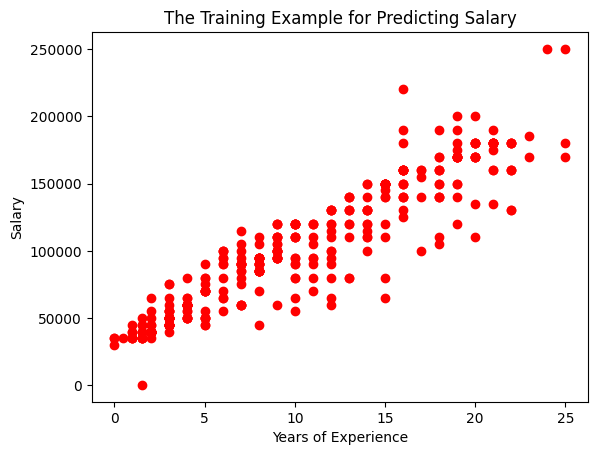

In [12]:
plt.scatter(x_train, y_train, c='r')  # Create a scatter plot with X_train and y_train, colored red
plt.xlabel('Years of Experience')  # Label the x-axis as 'Years of Experience'
plt.ylabel('Salary')  # Label the y-axis as 'Salary'
plt.title('The Training Example for Predicting Salary')  # Set the title of the plot
plt.show()  # Display the plot

**Goal of the Project
Our goal is to build a linear regression model to predict salaries based on years of experience. This model will help analyze the relationship between experience and salary, providing insights into earning potential.**


## 4 -  Linear Regression

 I will fit the linear regression parameters \((w,b)\) to my dataset.
- The production model for linear regression, which maps from \(x\) (years of experience) to \(y\) (salary), is represented as
    $$f_{w,b}(x) = wx + b$$
    
- To train the linear regression model, I want to find the best \((w,b)\) parameters that fit my dataset.  

    - To compare how one choice of \((w,b)\) is better or worse than another choice, I can evaluate it with a cost function \(J(w,b)\)
      - \(J\) is a function of \((w,b)\). That is, the value of the cost \(J(w,b)\) depends on the values of \((w,b)\).
  
    - The choice of \((w,b)\) that fits my data the best is the one that has the smallest cost \(J(w,b)\).

- To find the values \((w,b)\) that achieve the smallest possible cost \(J(w,b)\), I can use a method called **gradient descent**.
  - With each step of gradient descent, my parameters \((w,b)\) come closer to the optimal values that will achieve the lowest cost \(J(w,b)\).
  
**-The trained linear regression model can take all input features into account but will specifically predict salary \(y\) based on years of experience \(x\).**


<a name="ex01"></a>
### part  1

The `compute_cost` below to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b
    $$
   
    * The cost for that example  $$cost =  (f_{wb}^{(i)} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator



In [13]:
# GRADED FUNCTION: compute_cost

def compute_cost(x, y, w, b):
    # Step 1: Get the number of training examples (length of x)  it can be y also beacuse both are same
    m = len(x)

    # Step 2: Initialize the total cost to 0
    total_cost = 0;

    # Step 3: Create a placeholder for predictions (though not needed for this example)
    f_wb = np.zeros(m)

    # Step 4: Iterate over each training example
    for i in range(m):
        # Step 4.1: Calculate the prediction for the i-th example
        f_wb[i] = w * x[i] + b

        # Step 4.2: Compute the squared error (cost) for the i-th example
        cost = (f_wb[i] - y[i]) ** 2  # now cost is sinle numbers its run untill m

        # Step 4.3: Accumulate the cost to total_cost
        total_cost += cost

    # Step 5: Compute the final cost by averaging the total cost
    final_cost = (1 / (2 * m)) * total_cost

    # Step 6: Return the final cost value

    return final_cost


~np.isnan(x_train) returns False where there are NaN values, and True where the values are valid (no NaN).

In [14]:
initial_w = 2
initial_b = 1

cost = compute_cost(x_train , y_train , initial_w ,initial_b)
print(f"The Cost of total sum of j(w,b) is {cost}")

The Cost of total sum of j(w,b) is 6215626272.300268


**Alert:** The current cost of \( J(w, b) \) is **6215626272.30**, which is excessively high. 
This indicates that our initial guesses for \( w \) and \( b \) are far from optimal. 
We will now implement gradient descent to iteratively update \( w \) and \( b \) to minimize this cost 
and find the best-fit values.

**Notice:** **We will now check the cost at each step of gradient descent to monitor progress and ensure effective learning.**

In [15]:
import numpy as np

def compute_costallCase(x, y, w, b):
    # Step 1: Get the number of training examples (length of x)
    m = len(x)

    # Step 2: Initialize the total cost to 0
    total_cost = 0

    # Step 3: Create a placeholder for predictions (though not needed for this example)
    f_wb = np.zeros(m)

    # Step 4: Iterate over each training example
    for i in range(m):
        # Step 4.1: Calculate the prediction for the i-th example
        f_wb = w * x[i] + b

        # Print the current values for debugging
        if(i < 10):
          print(f"Example {i}:")
          print(f"  x[i] = {x[i]}")
          print(f"  y[i] = {y[i]}")
          print(f"  Prediction (f_wb) = {f_wb}")

        # Step 4.2: Compute the squared error (cost) for the i-th example
        cost = (f_wb - y[i]) ** 2
        # Step 4.3: Accumulate the cost to total_cost
        total_cost += cost

    # Step 5: Compute the final cost by averaging the total cost
    final_cost = (1 / (2 * m)) * total_cost

    # Print the final cost
    print(f"Final Cost = {final_cost}")

    # Step 6: Return the final cost value
    return final_cost


In [16]:
initial_w = 2
initial_b = 1

cost = compute_costallCase(x_train , y_train , initial_w ,initial_b)
print(f"The Cost of total sum of j(w,b) is {cost}")

Example 0:
  x[i] = 5.0
  y[i] = 90000.0
  Prediction (f_wb) = 11.0
Example 1:
  x[i] = 3.0
  y[i] = 65000.0
  Prediction (f_wb) = 7.0
Example 2:
  x[i] = 15.0
  y[i] = 150000.0
  Prediction (f_wb) = 31.0
Example 3:
  x[i] = 7.0
  y[i] = 60000.0
  Prediction (f_wb) = 15.0
Example 4:
  x[i] = 20.0
  y[i] = 200000.0
  Prediction (f_wb) = 41.0
Example 5:
  x[i] = 2.0
  y[i] = 55000.0
  Prediction (f_wb) = 5.0
Example 6:
  x[i] = 12.0
  y[i] = 120000.0
  Prediction (f_wb) = 25.0
Example 7:
  x[i] = 4.0
  y[i] = 80000.0
  Prediction (f_wb) = 9.0
Example 8:
  x[i] = 1.0
  y[i] = 45000.0
  Prediction (f_wb) = 3.0
Example 9:
  x[i] = 10.0
  y[i] = 110000.0
  Prediction (f_wb) = 21.0
Final Cost = 6215626272.300268
The Cost of total sum of j(w,b) is 6215626272.300268


As described, the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; &
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


I will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$



<a name="ex02"></a>
### part 2

 The `compute_gradient` function to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b
    $$
   
    * The gradient for the parameters $w, b$ from that example
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)})
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}
        $$
    
    * The sum of gradient for the parameters $w, b$ from that example
        $$
       Sum \frac{\partial J(w,b)}{\partial b}  =  (f_{w,b}(x^{(i)}) - y^{(i)})
        $$
        $$
       Sum \frac{\partial J(w,b)}{\partial w}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}
        $$

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)}
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator



In [17]:
def compute_gradient(x,y,w,b):
    m = len(x)
    f_wb = np.zeros(m)
    dj_dw = 0 
    dj_db = 0
    dj_dw_sum = 0 
    dj_db_sum = 0 
    
    for i in range(m):
        f_wb[i] = w * x[i] + b
        dj_dw_i = (f_wb[i] - y[i]) * x[i]
        dj_db_i = (f_wb[i] - y[i])
        dj_dw_sum+= dj_dw_i
        dj_db_sum+= dj_db_i
        
    dj_dw = (1 / m) * dj_dw_sum
    dj_db = (1 / m) * dj_db_sum
    
    return dj_dw,dj_db

In [18]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): -1302360.656836461 -100577.34584450403


In [19]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -1302329.9513404875 -100575.1396782842


<a name="2.6"></a>
###  Learning parameters using batch gradient descent

I will now find the optimal parameters of a linear regression model by using batch gradient descent. 
- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step.


In [20]:
def gradient_descent(x, y, w, b, compute_cost, compute_gradient, alpha, threshold, Maxiteration=1000000):
    cost_history = []
    previous_cost = float('inf')
    iteration = []

    for i in range(Maxiteration):
        # Compute gradients
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        # Update weights and bias using temp variables
        temp_w = w - alpha * dj_dw
        temp_b = b - alpha * dj_db

        w = temp_w
        b = temp_b

        # Compute cost and append to history
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)

        # Print cost every 1000 iterations
        if i % 1000 == 0:
            print(f'The iteration is {i} and cost {cost}')

        # Early stopping condition based on cost change
        if abs(previous_cost - cost) < threshold:
            print(f"Stopping early: Cost don't change to much after {i} iterations.")
            break

        # Update previous cost
        previous_cost = cost
        iteration.append(i)

    return w, b, cost_history, iteration


In [21]:
initial_w = 0.
initial_b = 0.

# Gradient descent settings
alpha = 0.01
cost_change_threshold = 1e-6  # Threshold for cost change

# Call the gradient descent function
rw, rb, cost_history , iteration  = gradient_descent(x_train, y_train, initial_w, initial_b,
                              compute_cost, compute_gradient, alpha, cost_change_threshold)

# Print without brackets
print("Weights and bias found by gradient descent:", rw, rb)  # Accessing the first element of rw

The iteration is 0 and cost 1457181883.4332345
The iteration is 1000 and cost 156421614.2039304
The iteration is 2000 and cost 156045997.31348267
The iteration is 3000 and cost 156045024.42592597
The iteration is 4000 and cost 156045021.90604413
Stopping early: Cost don't change to much after 4528 iterations.
Weights and bias found by gradient descent: 6844.513557014233 31921.17348214455


In [22]:
print(len(iteration), len(cost_history))  # Check the lengths


4528 4529


**always ensure that the lengths of your x and y data match when plotting. If you're ever in doubt about how to align data for plotting, just remember: each x-coordinate needs a corresponding y-coordinate for the plot to be meaningful and error-free.
**

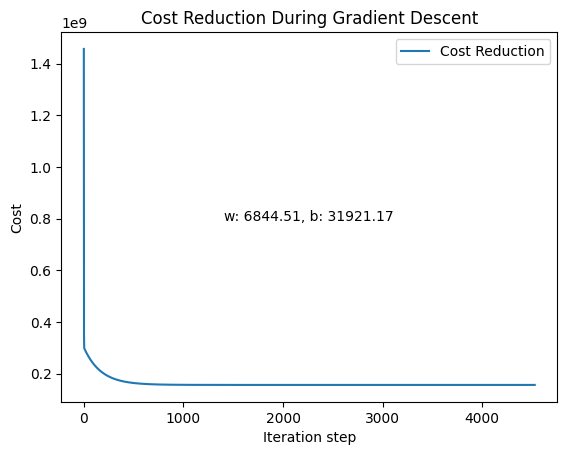

In [23]:
# Plot for the cost history
plt.plot(iteration, cost_history[:len(iteration)], label='Cost Reduction')  # Adjust the length to match

# Adding labels and title
plt.xlabel('Iteration step')
plt.ylabel('Cost')
plt.title('Cost Reduction During Gradient Descent')

# Add legend
plt.legend()

# Show weights and bias in the middle of the plot
plt.text(0.5, 0.5, f"w: {rw:.2f}, b: {rb:.2f}", fontsize=10, ha='center', va='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()


I am currently utilizing the final parameters obtained from gradient descent to visualize the linear fit.

As a reminder, the prediction for a single example can be calculated using the formula:

$f(x^{(i)})= wx^{(i)}+b$.

To compute the predictions for the entire dataset, I will iterate through all the training examples, calculating the prediction for each one. The implementation of this process is demonstrated in the code block below.


In [24]:
w= rw
b = rb
print(f"The final w is {w:.2f} and b is {b:.2f} ")

The final w is 6844.51 and b is 31921.17 


We will now use the final parameters from gradient descent to plot the linear fit. 

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [25]:
def final_prediaction(x , w , b):
    m = len(x)
    y_hat = np.zeros(m)
    for i in range(m):
        y_hat[i] = w * x[i] + b;
    return y_hat

In [26]:
# the final prediction i store in y_hat array to create a line to show
y_hat = final_prediaction(x_train ,w , b)

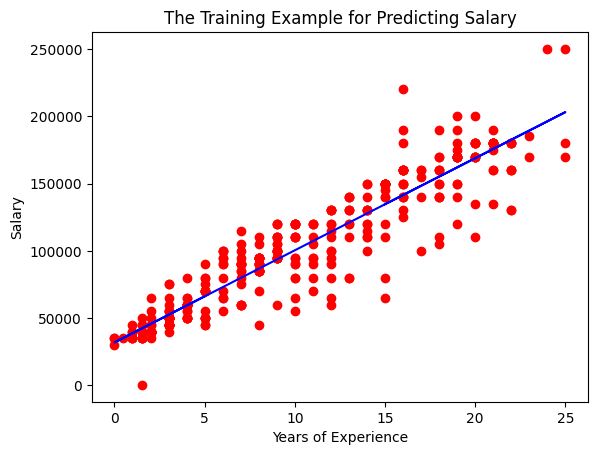

In [27]:
plt.plot(x_train , y_hat , c='b')
plt.scatter(x_train, y_train, c='r')  # Create a scatter plot with X_train and y_train, colored red
plt.xlabel('Years of Experience')  # Label the x-axis as 'Years of Experience'
plt.ylabel('Salary')  # Label the y-axis as 'Salary'
plt.title('The Training Example for Predicting Salary')  # Set the title of the plot
plt.show()  # Display the plot

**Seaborn default visualization let's see how close are these**

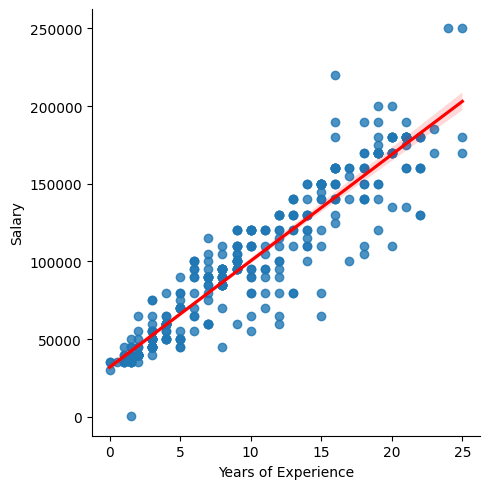

In [28]:
sns.lmplot(x='Years of Experience' , y='Salary', data=salary , line_kws={'color': 'red'})

**Yes its same**

Exciting Progress in My Model!

I have successfully completed the linear regression model, and it’s time to put it to the test! Using the model, I will predict salaries based on the years of experience. I’m eager to see how accurately the model captures the relationship between experience and salary, shedding light on the value that experience brings in the professional world. Let's uncover the insights together!

In [29]:
years_of_experience  = 1
predict_salary = w * years_of_experience + b
floored_salary = math.floor(predict_salary)
print(f"For years of experience {years_of_experience} , we predict a salary of in monthly ₹{floored_salary}")

For years of experience 1 , we predict a salary of in monthly ₹38765


In [30]:
with open('model_params.py', 'w') as f:
    f.write(f'w = {w}\n')
    f.write(f'b = {b}\n')